In [143]:
import numpy as np
import scipy as sp
import math
import pandas as pd
import matplotlib.pyplot as plt


In [144]:
rawdata = pd.read_excel('Industry_Portfolios.xlsx')
workdata = rawdata.drop(['Date'],axis =1)

c:\Users\kilohp\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [145]:
R = workdata.mean().to_numpy()
V = workdata.cov().to_numpy()
stdev = workdata.std()

In [34]:
resultdf = pd.concat([workdata.mean(),workdata.std()],axis=1).rename(columns = {0:'mean',1:'std dev'})

In [148]:
resultdf

,mean,std dev
NoDur,0.902833,3.345657
Durbl,0.733333,8.361852
Manuf,1.012833,5.310270
Enrgy,1.231167,6.081524
HiTec,0.766250,5.381191
Telcm,0.881417,4.448284
Shops,0.916333,4.093786
Hlth,0.783833,3.787172
Utils,0.907167,3.701763
Other,0.489083,5.582452


In [149]:
class mva():
    def __init__ (self,R,V):
        self.R = R #mean
        self.V = V #covariance matrix
        self.size =\
            len(self.R)
        self.V_inv =\
            np.linalg.inv(self.V)
        self.alpha =\
            np.dot(np.dot(self.R.T,self.V_inv),np.ones(self.size))
        self.zeta =\
            np.dot(np.dot(self.R.T,self.V_inv),self.R)
        self.delta =\
            np.dot(np.dot(np.ones(self.size),self.V_inv),np.ones(self.size))
        self.R_mv =\
            self.alpha/self.delta
    def var_frontier(self,R_p):
        return \
            (1/self.delta) + (R_p- self.R_mv)**2 *(self.delta / (self.zeta * self.delta - self.alpha**2))
    
    def var_riskless(self,R_p,rf):
        return \
            ((R_p -rf)**2)/(self.zeta - 2*self.alpha*rf + self.delta * rf**2)
    
    def weights_calc(self,R_p):
        _multiplier_1 = ((self.delta * R_p - self.alpha)/(self.zeta * self.delta - self.alpha ** 2))
        _multiplier_2 = ((self.zeta - self.alpha * R_p )/(self.zeta * self.delta - self.alpha ** 2))
        return _multiplier_1 * (np.dot(self.V_inv,R)) + _multiplier_2 * (np.dot(self.V_inv,np.ones(self.size)))
        
    def plot_efficient_frontier(self,R_p_list):
        _var_list = []
        for x in R_p_list :
            _var_list.append(self.var_frontier(x))
        plt.plot(np.sqrt(_var_list), R_p_list)

    def plot_efficient_frontier_riskless(self,R_p_list,rf):
        self.plot_efficient_frontier(R_p_list)
        _var_list = []
        for x in R_p_list :
            _var_list.append(self.var_riskless(x,rf))
        plt.plot(np.sqrt(_var_list), R_p_list)
            
    def tangent_riskless(self, R_p_list,rf):
        R_tg = (self.alpha * rf - self.zeta)/(self.delta * rf - self.alpha)
        var_tg = (self.zeta - 2 * self.alpha *rf + self.delta * rf**2) / (self.delta ** 2 * (rf- self.R_mv) ** 2)
        return {'return': R_tg, 'var':var_tg, 'std_dev': np.sqrt(var_tg)}
        

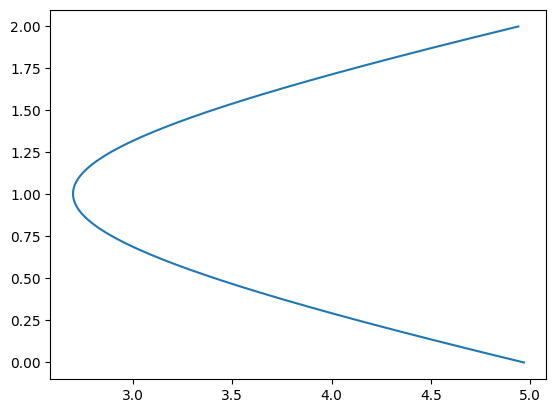

In [150]:
newmva = mva(R,V)
linspace_input  = np.linspace(0,2,1000)
newmva.plot_efficient_frontier(linspace_input)

In [151]:
print(newmva.var_frontier(1))

7.2789598622661424


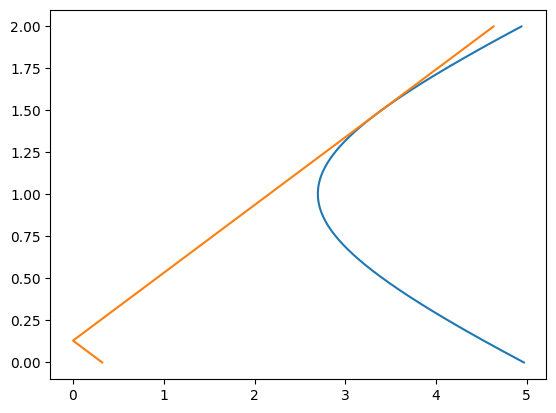

In [152]:
newmva.plot_efficient_frontier_riskless(linspace_input,0.13)

In [153]:
newmva.tangent_riskless(linspace_input,0.13)

{'return': 1.4862735358446917,
 'var': 11.294481468962084,
 'std_dev': 3.360726330566368}

In [154]:
tangent_portfolio =\
    pd.DataFrame(newmva.weights_calc(newmva.tangent_riskless(linspace_input,0.13)['return']),index = resultdf.index)\
        .rename(columns = {0:'weights'})

In [155]:
tangent_portfolio

,weights
NoDur,0.567972
Durbl,-0.214073
Manuf,0.714105
Enrgy,0.104087
HiTec,-0.363438
Telcm,-0.095463
Shops,0.991647
Hlth,0.075570
Utils,0.132643
Other,-0.913051
